In [27]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show



In [28]:
def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()


def rk4_fixed(f,x=0,tf,N):
    """
    
    RK4 Integrator for a fixed step size. 
    
    Start at t0 and go to tf, with N steps in between 
    
    """
    t0 = 0
    
    h = (tf - t0) /N
    
    xpoints = []
    tpoints = np.arange(a,b,h)
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
        
    return x,tpoints

SyntaxError: non-default argument follows default argument (<ipython-input-28-e27c613c15df>, line 27)

In [29]:
import numpy as np
def rk4_fixed(f,x=0,tf=10,N=100):
    """
    
    RK4 Integrator for a fixed step size. 
    
    Start at t0 and go to tf, with N steps in between 
    
    """
    t0 = 0
    
    h = (tf - t0) /N
    
    xpoints = []
    tpoints = np.arange(a,b,h)
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6
        
    return xpoints,tpoints



xpoints,tpoints = rk4_fixed(f,x=0,tf=10,N=100)

NameError: name 'a' is not defined

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
plt.plot(tpoints,xpoints)

NameError: name 'tpoints' is not defined

In [32]:
def rk4adaptive()

SyntaxError: invalid syntax (<ipython-input-32-77ac10baddca>, line 1)

Sick this works. Now apply it to a 2d orbit 

In [33]:
class rksolve:
	
	def __init__(self,f):
		
		self.f = f #self.array_decorator(f)
		
		self.initial_conditions = None
		self.solution = None
		
	def iterate(self,a,b,N=1000):
		
		#f = self.f
		r0 = array(self.initial_conditions)
		
		h = (b-a)/N
		
		tpoints = arange(a,b,h)
		solution = empty(tpoints.shape + r0.shape,float)
		
		#r_points[0] = r0
		r = r0
		for i,t in enumerate(tpoints):
		    solution[i]=r
		    r += self.estimate_delta(r,t,h)
		
		self.h = h
		self.solution = solution
		self.t = tpoints
		
	def estimate_delta(self,r,t,h):
		
		f = self.f
		k1 = h*f(r,t)
		k2 = h*f(r+0.5*k1,t+0.5*h)
		k3 = h*f(r+0.5*k2,t+0.5*h)
		k4 = h*f(r+k3,t+h)
		return (k1+2*k2+2*k3+k4)/6


In [40]:

class rksolve:

    def __init__(self,f):

        self.f = f #self.array_decorator(f)

        self.initial_conditions = None
        self.solution = None

    def iterate(self,a,b,N=1000):

        #f = self.f
        r0 = array(self.initial_conditions)

        h = (b-a)/N

        tpoints = arange(a,b,h)
        solution = empty(tpoints.shape + r0.shape,float)

        #r_points[0] = r0
        r = r0
        for i,t in enumerate(tpoints):
            solution[i]=r
            r += self.estimate_delta(r,t,h)

        self.h = h
        self.solution = solution
        self.t = tpoints

    def estimate_delta(self,r,t,h):

        f = self.f
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        return (k1+2*k2+2*k3+k4)/6

class rksolve_adaptive(rksolve):

    def iterate(self,a,b,delta=1):


        r0 = array(self.initial_conditions)

        h = (b-a)/10000
        solution = []
        time = []
        r = r0
        t = a

        solution.append(copy(r))
        time.append(t)

        ro = 1
        while t<b:
            if ro<2:
                h = h*ro**(1/4)
            else:
                h*=2
            # estimating ro
            r1 = r + self.estimate_delta(r,t,h)
            r1 += self.estimate_delta(r1,t+h,h)
            r2 = r + self.estimate_delta(r,t,2*h)
            difference = r1 - r2
            ro = 30*h*delta/sqrt(difference[0]**2 + difference[1]**2)

            if ro>1:
                t +=2*h
                r = r1
                solution.append(copy(r))
                time.append(t)


        self.h = h
        self.solution = array(solution)
        self.t = time


def f(r,t):

    x,y,vx,vy = r

    Dx = vx
    Dy = vy

    R = sqrt(x**2 + y**2)

    Dvx = -G*M*x/R**3
    Dvy = -G*M*y/R**3

    return array([Dx,Dy,Dvx,Dvy])

prob = rksolve_adaptive(f)

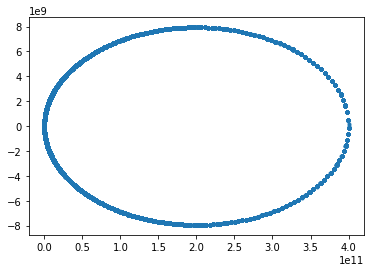

In [53]:

class rksolve:
	
	def __init__(self,f):
		
		self.f = f #self.array_decorator(f)
		
		self.initial_conditions = None
		self.solution = None
		
	def iterate(self,a,b,N=1000):
		
		#f = self.f
		r0 = array(self.initial_conditions)
		
		h = (b-a)/N
		
		tpoints = arange(a,b,h)
		solution = empty(tpoints.shape + r0.shape,float)
		
		#r_points[0] = r0
		r = r0
		for i,t in enumerate(tpoints):
		    solution[i]=r
		    r += self.estimate_delta(r,t,h)
		
		self.h = h
		self.solution = solution
		self.t = tpoints
		
	def estimate_delta(self,r,t,h):
		
		f = self.f
		k1 = h*f(r)
		k2 = h*f(r+0.5*k1)
		k3 = h*f(r+0.5*k2)
		k4 = h*f(r+k3)
		return (k1+2*k2+2*k3+k4)/6

class rksolve_adaptive(rksolve):
	
	def iterate(self,a,b,delta=1):
		
		
		r0 = array(self.initial_conditions)
		
		h = (b-a)/10000
		solution = []
		time = []
		r = r0
		t = a
		
		solution.append(copy(r))
		time.append(t)
		
		ro = 1
		while t<b:	
			if ro<2:
				h = h*ro**(1/4)
			else:
				h*=2
			# estimating ro
			r1 = r + self.estimate_delta(r,t,h)
			r1 += self.estimate_delta(r1,t+h,h)			
			r2 = r + self.estimate_delta(r,t,2*h)
			difference = r1 - r2
			ro = 30*h*delta/sqrt(difference[0]**2 + difference[1]**2)
			
			if ro>1:
				t +=2*h
				r = r1
				solution.append(copy(r))
				time.append(t)
			
		
		self.h = h
		self.solution = array(solution)
		self.t = time


G = 6.67e-11
M = 1.9e30

def f(r):
	
	x,y,vx,vy = r
	
	Dx = vx
	Dy = vy
	
	R = sqrt(x**2 + y**2)
	
	Dvx = -G*M*x/R**3
	Dvy = -G*M*y/R**3
	
	return array([Dx,Dy,Dvx,Dvy])
	
prob = rksolve_adaptive(f)


R = 1.496e3
T = 3.156e7 
v = 2*pi*R/T
prob.initial_conditions = [4e11,0,0,500]

delta = 1e3/365/24/60/60
prob.iterate(0,T*50,delta=delta)


x = prob.solution[:,0]
y = prob.solution[:,1]

plot(x,y,'.')
show()


In [9]:
delta

3.1709791983764585e-05

Where is this delta coming from? 

In [ ]:
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 10
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

In [ ]:
def rk4_adaptive(f,a,b,N,r):
    """
    
    Adaptive step size rk4 code. 
    
    Returns continuous x y vx and vy as a function of time values for a given function f. 
    
    
    """
    
    #first iniital conditions come from r
    
    x,y,vx,vy = r
    
    tpoints = arange(a,b,h)
    h = (b-a)/N
    xpoints = []
    ypoints = []
    vxpoints = []
    vypoints = []
    
    for t in tpoints:
        xpoints.append(x)
        ypoints.append(y)
        vxpoints.append(vx)
        vypoints.append(vy)
        
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)

        x += (k1+2*k2+2*k3+k4)/6
        
        k1 = h*f(y,t)
        k2 = h*f(y+0.5*k1,t+0.5*h)
        k3 = h*f(y+0.5*k2,t+0.5*h)
        k4 = h*f(y+k3,t+h)

        y += (k1+2*k2+2*k3+k4)/6
        
        k1 = h*f(vx,t)
        k2 = h*f(vx+0.5*k1,t+0.5*h)
        k3 = h*f(vx+0.5*k2,t+0.5*h)
        k4 = h*f(vx+k3,t+h)

        vx += (k1+2*k2+2*k3+k4)/6
        
        k1 = h*f(vy,t)
        k2 = h*f(vy+0.5*k1,t+0.5*h)
        k3 = h*f(vy+0.5*k2,t+0.5*h)
        k4 = h*f(vy+k3,t+h)

        vy += (k1+2*k2+2*k3+k4)/6

In [25]:
def f(r):

    x,y,vx,vy = r

    Dx = vx
    Dy = vy

    R = sqrt(x**2 + y**2)

    Dvx = -G*M*x/R**3 -1
    Dvy = -G*M*y/R**3

    return array([Dx,Dy,Dvx,Dvy])

In [26]:
f([0,1,1,0])

array([ 1.,  0., -1., -1.])